#Data Gambar

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pth = '/content/drive/MyDrive/MSIB/04. Prepocess Data/python-logo.png'

Membaca dan menampilkan gambar

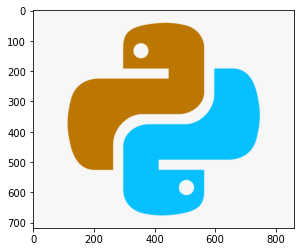

In [3]:
img = cv2.imread(pth)
plt.imshow(img)

Menampilkan ukuran panjang dan lebar gambar  
format : (panjang, lebar, jumlah channel)

In [4]:
print(img.shape)

(717, 860, 3)


Konversi channel pada gambar  
BGR -> RGB

(717, 860, 3)


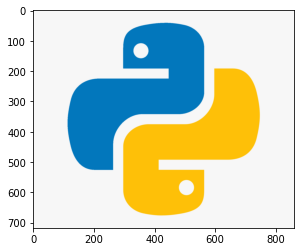

In [5]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(imgRGB.shape)
plt.imshow(imgRGB)

Konversi channel pada gambar  
BGR -> grayscale

(717, 860)


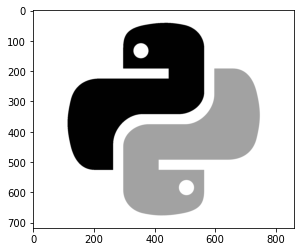

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')

Memotong (crop) gambar

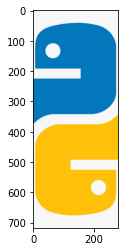

In [7]:
crop = imgRGB[:,290:570]
plt.imshow(crop)

Mengubah ukuran (resizing) gambar dengan ukuran tetap

(1000, 1000, 3)


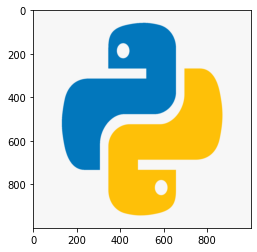

In [8]:
imgrsz = cv2.resize(imgRGB, (1000,1000))
print(imgrsz.shape)
plt.imshow(imgrsz)

Mengubah ukuran (resizing) gambar dengan ukuran skala

(1792, 2150, 3)


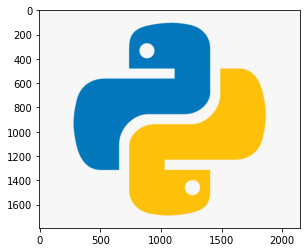

In [9]:
imgrsz = cv2.resize(imgRGB, (0,0), fx=2.5, fy= 2.5)
print(imgrsz.shape)
plt.imshow(imgrsz)

Geometrical Image Transformation - Rotation 

(860, 717, 3)


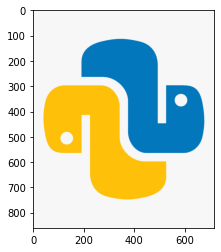

In [28]:
imgrt= cv2.rotate(imgRGB, cv2.cv2.ROTATE_90_CLOCKWISE)
print(imgrt.shape)
plt.imshow(imgrt)

Binary thresholding

(717, 860) (717, 860)


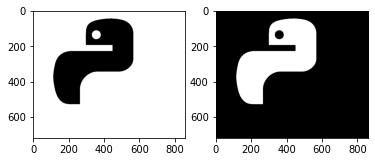

In [11]:
ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
print(thresh1.shape,thresh2.shape)
plt.subplot(121);plt.imshow(thresh1, cmap='gray')
plt.subplot(122);plt.imshow(thresh2, cmap='gray')

Morphological Image Transformation - Erotion

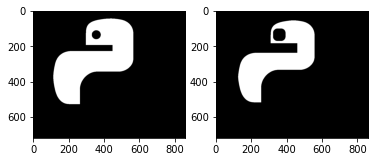

In [12]:
imger = cv2.erode(thresh2, kernel = np.ones([5,5],np.uint8), iterations=5)
plt.subplot(121);plt.imshow(thresh2, cmap='gray')
plt.subplot(122);plt.imshow(imger, cmap='gray')

#Data Teks

In [13]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer

Tokenisasi

In [14]:
kalimat = "berikut ini contoh tokenisasi data teks"
token = kalimat.split()
print(token)

['berikut', 'ini', 'contoh', 'tokenisasi', 'data', 'teks']


In [15]:
tweet = 'Yg paLING gw SUka dr Python adalah gAMpang dipahami utk pemula.....'

Case folding

In [16]:
lowercase = tweet.lower()
print(lowercase)

yg paling gw suka dr python adalah gampang dipahami utk pemula.....


Menghapus karakter/simbol

In [17]:
tweet_alpha = lowercase.strip('.')
print(tweet_alpha)

yg paling gw suka dr python adalah gampang dipahami utk pemula


Slangword Handling

In [18]:
formal = {'gw':'saya','yg':'yang','dr':'dari','gampang':'mudah','utk':'untuk'}
slang = tweet_alpha.split()
slang = [formal[x] if x in formal.keys() else x for x in slang]
tweet_slang = ''.join(' '.join(x for x in slang))
print(tweet_slang)

yang paling saya suka dari python adalah mudah dipahami untuk pemula


Stemming

In [19]:
stemmer = StemmerFactory().create_stemmer()

tweet_stem = stemmer.stem(tweet_slang)
print(tweet_stem)

yang paling saya suka dari python adalah mudah paham untuk mula


Stopword Removal

In [20]:
stopword = StopWordRemoverFactory().create_stop_word_remover()

stopword.remove(tweet_stem)

'paling suka python mudah paham mula'

Feature Extraction

In [21]:
corpus = [
  'This is the first document.',
  'This document is the second document.',
  'And this is the third one.',
  'Is this the first document?'
  ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [22]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [23]:
print(X.shape)
X

(4, 9)


<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

#Data Audio

In [24]:
import librosa
import librosa.display

Membaca data audio

In [25]:
# 1. Get the file path to an included audio example
filename = librosa.example('nutcracker')


# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 107.67 beats per minute


Ekstraksi Fitur - Spectogram

In [26]:
librosa.feature.melspectrogram(y=y, sr=sr)

array([[5.62276337e-11, 1.40581852e-11, 2.69301635e-18, ...,
        9.72367354e-16, 1.73904858e-12, 1.44556755e-10],
       [5.83838533e-11, 1.45955140e-11, 2.15571457e-18, ...,
        1.72437792e-15, 1.77103590e-12, 1.49262241e-10],
       [5.88857296e-11, 1.47199163e-11, 2.58363578e-18, ...,
        1.86785884e-15, 1.81049912e-12, 1.50909160e-10],
       ...,
       [3.25754368e-10, 9.57305762e-11, 2.70095724e-10, ...,
        2.39920990e-08, 3.48676430e-08, 2.45345735e-08],
       [1.11286802e-08, 9.41908507e-09, 1.38748648e-08, ...,
        3.10395691e-08, 2.10440412e-08, 1.70538428e-08],
       [3.96539726e-08, 4.09047090e-08, 3.93094481e-08, ...,
        2.96756717e-08, 2.01051087e-08, 1.36883385e-08]], dtype=float32)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

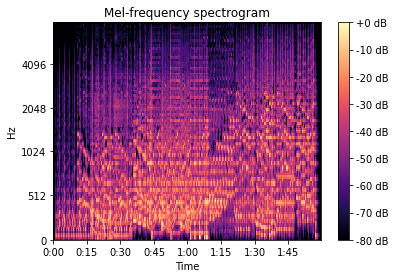

In [27]:
S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')